# Functions & libs

In [2]:
import os 
import duckdb_query_graph
import json
import csv
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt

cwd = os.getcwd()

In [3]:
# function: clean the data
# drop useless columns, rename column names, move 'job_query' column to the first, sort by 'job_query'
def clean_df(df):
    df = df.drop(['tree.name', 'tree.timing', 'tree.cardinality', 'tree.extra_info', 'tree.children'], axis = 1)
    df.columns = df.columns.str.replace('[>]','.', regex=True)
    df.columns = df.columns.str.replace('[ ]','', regex=True)
    df = df[ ['job_query'] + [ col for col in df.columns if col != 'job_query' ] ]
    df.sort_values(by = 'job_query')
    return df

In [4]:
# function: load json files
def read_json_from_dir(folder_dir, df):
    count_json = 0 #initialize amount of json files
    for file in os.listdir(folder_dir):
        if file.endswith(".json"):
            file_dir = folder_dir+'/'+file
            with open(file_dir, 'r') as f:
                count_json+=1
                data = f.read()
                data_df = pd.json_normalize(json.loads(data))
                data_df['job_query'] = file
                #print(type(data_df))
                df = pd.concat([df,data_df], sort=False)
    df = clean_df(df)
    print(str(count_json) + " json files have been loaded!")
    return df

# Plot style

In [5]:
plt.rcParams["figure.figsize"] = (20,3)

# Execution

In [6]:
my_dir = cwd + '/records/with_shrink_imdb/1a_sql_with_diff_join_order'
my_df = pd.DataFrame() #initialize datafram
my_df = read_json_from_dir(my_dir, my_df)
display(my_df)

36 json files have been loaded!


,job_query,result,timings.optimizer,timings.optimizer.join_order,timings.physical_planner,timings.physical_planner.column_binding,timings.physical_planner.create_plan,timings.physical_planner.resolve_types,timings.planner,timings.planner.binder
0,43210.json,0.025968,0.008167,0.007941,0.002567,0.000745,0.000909,0.000703,0.004016,0.003907
0,23104.json,0.020709,0.006800,0.006592,0.001861,0.000507,0.000765,0.000426,0.003381,0.003300
0,23041.json,0.023260,0.007455,0.007218,0.001977,0.000537,0.000825,0.000459,0.003862,0.003765
0,32410.json,0.031292,0.010148,0.009841,0.002807,0.000822,0.001033,0.000698,0.004546,0.004428
0,24301.json,0.024302,0.008280,0.008050,0.002127,0.000566,0.000885,0.000506,0.003892,0.003797
0,31420.json,0.025373,0.008102,0.007823,0.001955,0.000509,0.000797,0.000492,0.004715,0.004604
0,34120.json,0.031733,0.009607,0.009297,0.002997,0.000831,0.001137,0.000776,0.004532,0.004406
0,13204.json,0.025513,0.008849,0.008602,0.002089,0.000569,0.000860,0.000495,0.004363,0.004266
0,42031.json,0.027726,0.008420,0.008207,0.002559,0.000585,0.001063,0.000675,0.003795,0.003702
0,02341.json,0.021822,0.007094,0.006870,0.001905,0.000512,0.000799,0.000440,0.003643,0.003554


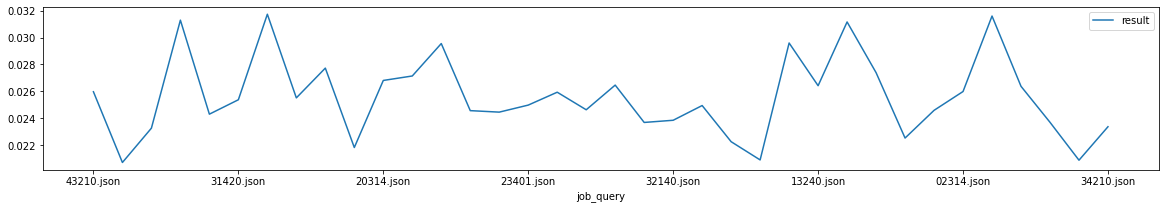

In [7]:
my_df[['job_query','result']].plot(x='job_query')
plt.show()

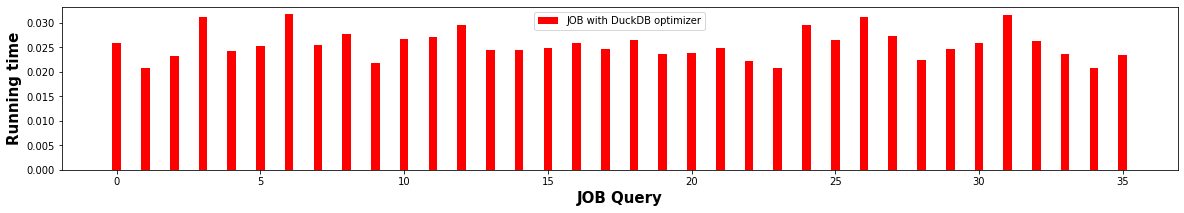

In [12]:
bar_width = 0.3

bar_pos_1 = np.arange(len(my_df['job_query']))

plt.bar(bar_pos_1, my_df['result'].to_numpy(), color ='r', width = bar_width, label ='JOB with DuckDB optimizer')

plt.xlabel('JOB Query', fontweight ='bold', fontsize = 15)
plt.ylabel('Running time', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

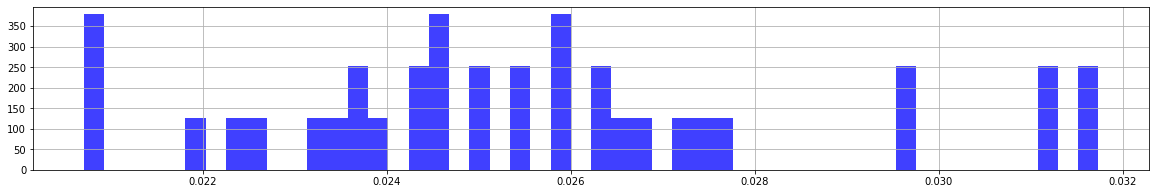

In [19]:
n, bins, patches = plt.hist(my_df['result'], 50, density=True, facecolor='b', alpha=0.75)
plt.grid(True)
plt.show()